# Prova Intermediária - Algotrading

João Alonso Casella, 4º semestre de Economia

# Introdução

Para este projeto de Simulação por modelos direcionais, foram escolhidos os seguintes indicadores técnicos: 

#a) Moving Average Convergence/Divergence (MACD)
#b) Force Index (FI)
#c) Keltner Channel Strategy

Este estudo se trata de uma análise dos sinais a serem colocados por cada um dos indicadores técnicos acima, de tal forma a entregar, através de uma modulação e combinação de seus resultados, uma recomendação ao final da simulação sobre 3 diferentes ativos em um período de teste de 10 anos.

O estudo trará consigo uma interpretação dos resultados obtidos, além de uma fundamentação para tais recomendações (de compra ou venda), justificando seus respectivos volumes.


Os três ativos escolhidos são:

#i)   BRK-B --> Berkshire Hathaway

Racional/Motivação: 'Gerida pelo value investor mais respeitado da história, Warren Buffet, a Berkshire Hathaway é uma holding com participações majoritárias em grandes empresas, como GEICO e Dairy Queen, assim como minoritárias em companhias como Apple. Esbanjando de um portifólio sólido e diversificado, a empresa faz apostas de longo prazo em companhias de valor.'

#ii)  BLK ----> BlackRock

Racional/Motivação: 'Como maior Asser Manager do mundo, a BlackRock atua desde de 1988 na gestão de ativos, consolidando um AUM de US$ 10 trilhões. A firma consolida expertise em diversos setores do mercado de capitais, assim como nas diciplinas de gestão de portfólio, modelagem financeira e gestão de risco.'

#iii) JPM ----> JPMorgan Chase

Racional/Motivação: 'Maior banco dos Estados Unidos em valor de mercado, JP Morgan é um "one stop shop" para toda Wall Street, atuando com primazia em todas as áreas de Investment Banking. O banco tem muito a se beneficiar do constante aumento em deals de M&A e IPOs, sendo que a queda do papel devido à invasão russa pode apresentar-se como uma excelente buy oportunity.'


Período de Análise: 09/03/2012 a 09/03/2022

=====================================================================================================

In [1]:
# Importando bibliotecas

%matplotlib inline


from pandas_datareader import data as pdr
from math import floor
from IPython import display
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import random

from backtesting import evaluateHist, evaluateIntr, Strategy, Order

=====================================================================================================
# Primeiro Ativo: BRK-B

In [2]:
import yahoofinancials as yf
ticker = 'BRK-B'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))

In [3]:
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,79.029999,79.500000,78.830002,79.410004,79.410004,3625600
1,2012-03-12,79.430000,79.660004,79.300003,79.540001,79.540001,3004000
2,2012-03-13,79.720001,80.849998,79.660004,80.760002,80.760002,7088200
3,2012-03-14,80.690002,80.889999,80.389999,80.709999,80.709999,4494000
4,2012-03-15,80.550003,81.370003,80.330002,81.339996,81.339996,4947100


=====================================================================================================
# a) Moving Average Convergence/Divergence (MACD)

Number of trades: 212
Gross P&L: 53.50
Gross Accumulated return: 0.15%
Gross Average Return: 0.03%
Net P&L: 53.42
Hitting ratio: 38.21%



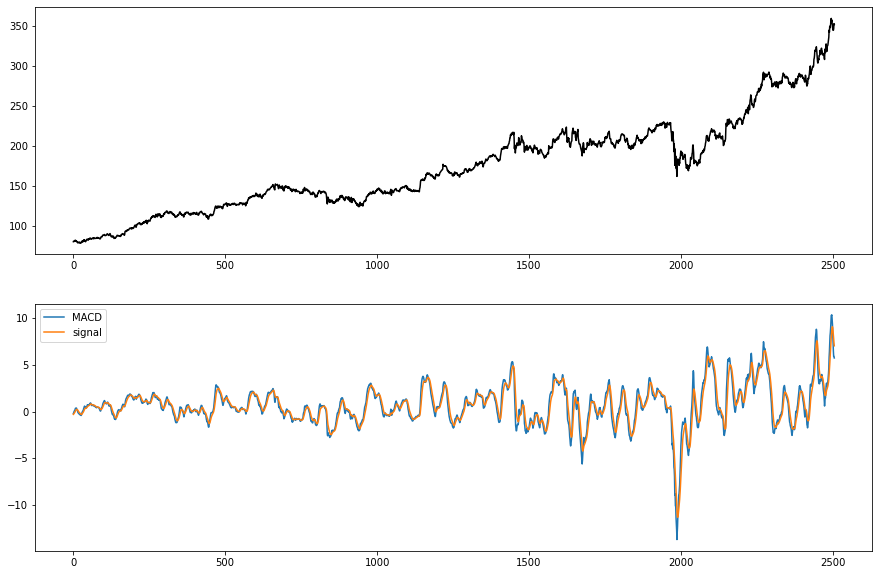

In [4]:
class MACD(Strategy):

    def __init__(self):
        self.slow = 26 # um mês (trading week = 5 dias)
        self.fast = 12 # 2 semanas
        self.signal = 9 # uma semana e meia
        self.prices = []
        self.indicator = []
        self.side = 0

    def push(self, event):
        orders = []
        price = event.price[3] 
        self.prices.append(price)
        
        if len(self.prices) >= self.slow + self.signal:
            fastEMA = pd.Series(self.prices).ewm(span=self.fast).mean()
            slowEMA = pd.Series(self.prices).ewm(span=self.slow).mean()
            macd = fastEMA - slowEMA
            signalEMA = macd.ewm(span=self.signal).mean()
            self.indicator.append([macd.iloc[-1], signalEMA.iloc[-1]])                        
            signal = (macd.iloc[-1] > signalEMA.iloc[-1])*2 - 1
            
            if self.side != signal:
                orders.append(Order(event.instrument, -self.side, 0))
                orders.append(Order(event.instrument, signal, 0))
                self.side = signal

        return orders
    
modelMACD = MACD()
print(evaluateHist(modelMACD, {'BRK-B': 'BRK-B.csv'}))

fig, ax = plt.subplots(2, 1, figsize=(15,10));

ax[0].plot(modelMACD.prices[-len(modelMACD.indicator):], color='black');
ax[1].plot(modelMACD.indicator);
ax[1].legend(['MACD', 'signal']);

=====================================================================================================
# b) Force Index (FI)

In [33]:
import yahoofinancials as yf
ticker = 'BRK-B'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,79.029999,79.500000,78.830002,79.410004,79.410004,3625600
1,2012-03-12,79.430000,79.660004,79.300003,79.540001,79.540001,3004000
2,2012-03-13,79.720001,80.849998,79.660004,80.760002,80.760002,7088200
3,2012-03-14,80.690002,80.889999,80.389999,80.709999,80.709999,4494000
4,2012-03-15,80.550003,81.370003,80.330002,81.339996,81.339996,4947100


In [34]:
def ForceIndex(data,ndays):
    ForceIndex=pd.Series(data['Close'].diff(ndays)* data['Volume'],name='ForceIndex')
    data=data.join(ForceIndex)
    return data
data = pdr.get_data_yahoo("BRK-B", start="2012-03-09", end="2022-03-09") 
data = pd.DataFrame(data)
print(data)

n = 1
BRK_B_ForceIndex = ForceIndex(data,n)
print(BRK_B_ForceIndex)

                  High         Low        Open       Close   Volume  \
Date                                                                  
2012-03-09   79.500000   78.830002   79.029999   79.410004  3625600   
2012-03-12   79.660004   79.300003   79.430000   79.540001  3004000   
2012-03-13   80.849998   79.660004   79.720001   80.760002  7088200   
2012-03-14   80.889999   80.389999   80.690002   80.709999  4494000   
2012-03-15   81.370003   80.330002   80.550003   81.339996  4947100   
...                ...         ...         ...         ...      ...   
2022-03-03  329.470001  323.890015  326.630005  327.739990  4594300   
2022-03-04  325.609985  320.119995  322.660004  325.339996  4901900   
2022-03-07  326.440002  320.350006  325.679993  322.720001  5875800   
2022-03-08  327.290009  318.029999  325.299988  318.519989  7905000   
2022-03-09  327.470001  322.579987  326.589996  325.399994  5874500   

             Adj Close  
Date                    
2012-03-09   79.410004  
2

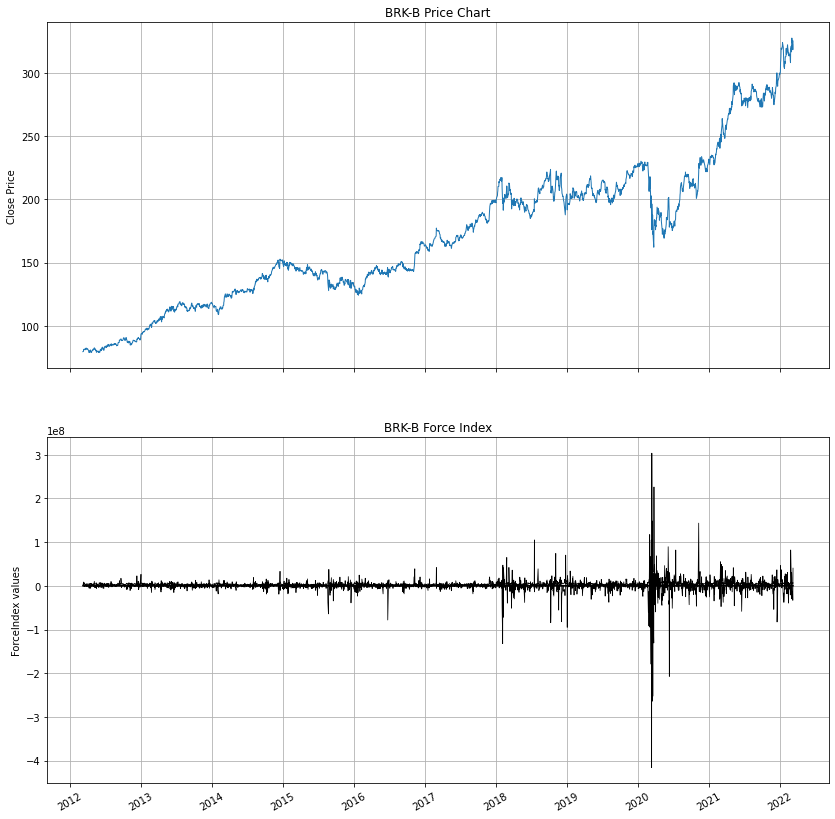

In [47]:
class ForceIndex(Strategy):
    def _init_(self):
        self.signal = 13
        self.prices = []
        self.indicator = []
        self.side = 0
    def push(self,event):
        orders = []
        prices = event.price[3] 
        self.prices.append(price)
        
        avg = 0
        up =0.3
        down = -0.3  
            
        self.indicator.append([up, avg, down])
                                    
        if prices < down:
            signal = -1 
        elif prices > up:
            signal = 1
        elif prices > avg and self.side == -1:
            signal = 0
        elif prices < avg and self.side == 1:
            signal = 0
        else:
            signal = self.side
            
            
        if self.side != signal:
            orders.append(Order(event.instrument, -self.side, 0))
            orders.append(Order(event.instrument, signal, 0))
            self.side = signal

        return orders
    
modelFI = ForceIndex()
fig=plt.figure(figsize=(14,14))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BRK-B Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(BRK_B_ForceIndex,'k',lw=0.75,linestyle='-')
plt.title('BRK-B Force Index')
plt.ylabel('ForceIndex values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

#print(evaluateHist(modelFI, {'BRK-B': 'BRK-B.csv'}))

=====================================================================================================
# c) Keltner Channel Strategy

In [9]:
import yahoofinancials as yf
ticker = 'BRK-B'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,79.029999,79.500000,78.830002,79.410004,79.410004,3625600
1,2012-03-12,79.430000,79.660004,79.300003,79.540001,79.540001,3004000
2,2012-03-13,79.720001,80.849998,79.660004,80.760002,80.760002,7088200
3,2012-03-14,80.690002,80.889999,80.389999,80.709999,80.709999,4494000
4,2012-03-15,80.550003,81.370003,80.330002,81.339996,81.339996,4947100


In [10]:
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower

In [11]:
df=df.iloc[:,:5]
df['kc_middle'], df['kc_upper'], df['kc_lower'] = get_kc(df['high'],df['low'],df['close'],20,2,10)
df.head()

,formatted_date,open,high,low,close,kc_middle,kc_upper,kc_lower
0,2012-03-09,79.029999,79.500000,78.830002,79.410004,79.410004,80.750000,78.070007
1,2012-03-12,79.430000,79.660004,79.300003,79.540001,79.476588,80.490271,78.462905
2,2012-03-13,79.720001,80.849998,79.660004,80.760002,79.925426,81.531845,78.319008
3,2012-03-14,80.690002,80.889999,80.389999,80.709999,80.136149,81.566232,78.706067
4,2012-03-15,80.550003,81.370003,80.330002,81.339996,80.400967,81.989756,78.812177


In [12]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(0)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(0)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        else:
            buy_price.append(0)
            sell_price.append(0)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(df['close'], df['kc_upper'], df['kc_lower'])

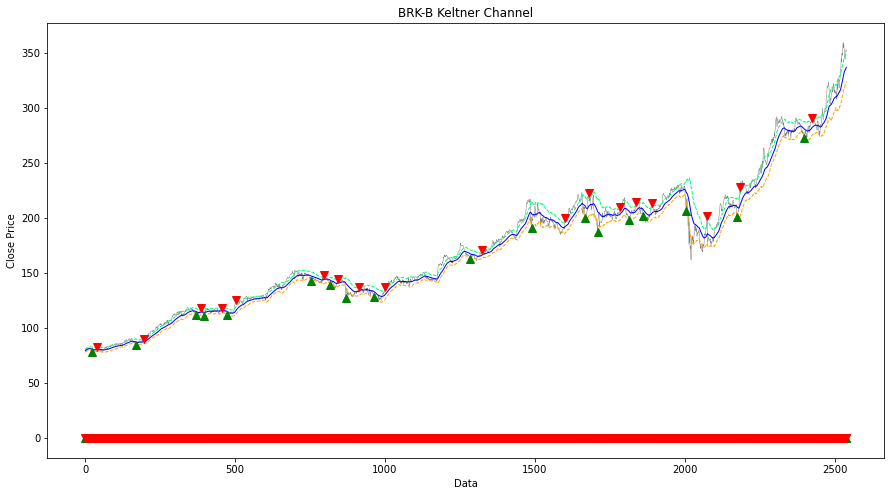

In [13]:
#df['formatted_date'] = pd.to_datetime(df['formatted_date'])
#df = df.set_index('formatted_date')

fig=plt.figure(figsize=(15,8))
df.close.plot(linewidth = 0.5,color = 'grey')
plt.title('BRK-B Keltner Channel')
plt.grid(True)
df.kc_upper.plot(linewidth = 1, color = 'springgreen', linestyle = '--')
df.kc_middle.plot(linewidth = 1, color = 'blue')
df.kc_lower.plot(linewidth = 1, color = 'orange', linestyle = '--')
plt.ylabel('Close Price')
plt.xlabel('Data')
plt.plot(buy_price, marker = '^', color = 'green', markersize = 8, linewidth = 0)
plt.plot(sell_price, marker = 'v', color = 'red', markersize = 8, linewidth = 0)

#Cinza: Preço de Fechamento
#Azul: KC Middle
#Verde: KC Upper
#Laranja: KC Lower
#Marcador Verde: Sinal de Compra
#Marcador Vermelho: Sinal de Venda

In [14]:
position = []

for i in range(len(kc_signal)):
    if kc_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(1,len(df['close'])-1):
    if kc_signal[i] == 1:
        position[i] = 1
    elif kc_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
close_price = df['close']
kc_upper = df['kc_upper']
kc_lower = df['kc_lower']
kc_signal = pd.DataFrame(kc_signal)
position = pd.DataFrame(position)

frames = [close_price, kc_upper, kc_lower, kc_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

,close,kc_upper,kc_lower,0,0
0,79.410004,80.750000,78.070007,0,1
1,79.540001,80.490271,78.462905,0,1
2,80.760002,81.531845,78.319008,0,1
3,80.709999,81.566232,78.706067,0,1
4,81.339996,81.989756,78.812177,0,1
...,...,...,...,...,...
2534,345.429993,347.506324,320.323180,0,0
2535,344.799988,347.697512,321.168681,0,0
2536,344.709991,348.144450,321.700496,0,0
2537,346.510010,348.428043,322.520477,0,0


In [42]:
strategy.columns = strategy.columns.astype(str)
strategy.columns.map(type)
strategy2 = pd.DataFrame(strategy)
list(strategy2)
strategy2.columns = ['close', 'kc_upper', 'kc_lower', 'kc_signal','position']
print(strategy2)



           close    kc_upper    kc_lower  kc_signal  position
0      79.410004   80.750000   78.070007          0         1
1      79.540001   80.490271   78.462905          0         1
2      80.760002   81.531845   78.319008          0         1
3      80.709999   81.566232   78.706067          0         1
4      81.339996   81.989756   78.812177          0         1
...          ...         ...         ...        ...       ...
2534  345.429993  347.506324  320.323180          0         0
2535  344.799988  347.697512  321.168681          0         0
2536  344.709991  348.144450  321.700496          0         0
2537  346.510010  348.428043  322.520477          0         0
2538  353.100006  349.439985  323.187177          0         0

[2539 rows x 5 columns]


# Segundo Ativo: BLK

=====================================================================================================
# a) Moving Average Convergence/Divergence (MACD)

In [48]:
import yahoofinancials as yf
ticker = 'BLK'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,196.320007,197.509995,195.279999,196.910004,152.656235,437600
1,2012-03-12,196.979996,196.979996,194.509995,194.880005,151.082428,627300
2,2012-03-13,197.000000,203.009995,195.259995,203.000000,157.377533,773000
3,2012-03-14,206.419998,206.419998,198.839996,200.669998,155.571167,491300
4,2012-03-15,201.240005,205.089996,199.350006,205.080002,158.990067,537600


Number of trades: 203
Gross P&L: 204.31
Gross Accumulated return: 0.25%
Gross Average Return: 0.23%
Net P&L: 204.13
Hitting ratio: 36.45%



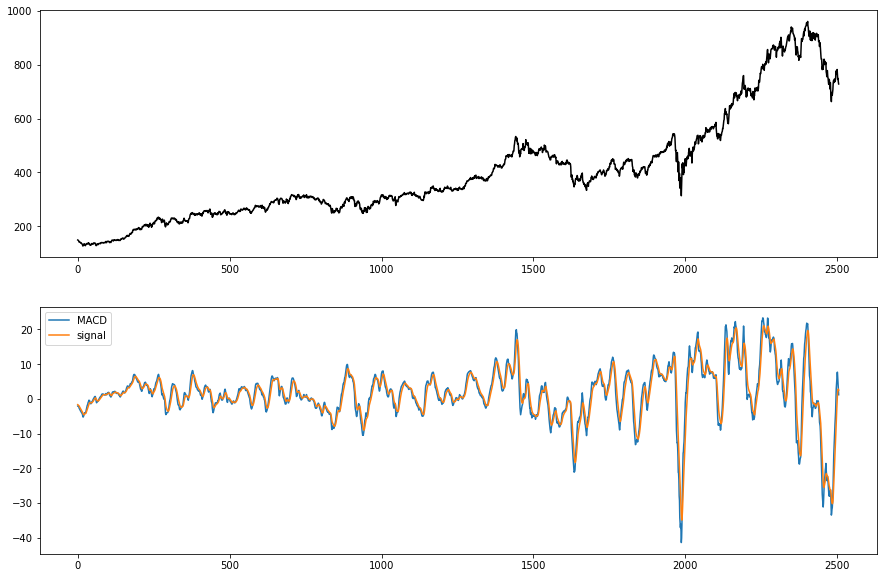

In [49]:
class MACD(Strategy):

    def __init__(self):
        self.slow = 26 # um mês (trading week = 5 dias)
        self.fast = 12 # 2 semanas
        self.signal = 9 # uma semana e meia
        self.prices = []
        self.indicator = []
        self.side = 0

    def push(self, event):
        orders = []
        price = event.price[3] 
        self.prices.append(price)
        
        if len(self.prices) >= self.slow + self.signal:
            fastEMA = pd.Series(self.prices).ewm(span=self.fast).mean()
            slowEMA = pd.Series(self.prices).ewm(span=self.slow).mean()
            macd = fastEMA - slowEMA
            signalEMA = macd.ewm(span=self.signal).mean()
            self.indicator.append([macd.iloc[-1], signalEMA.iloc[-1]])                        
            signal = (macd.iloc[-1] > signalEMA.iloc[-1])*2 - 1
            
            if self.side != signal:
                orders.append(Order(event.instrument, -self.side, 0))
                orders.append(Order(event.instrument, signal, 0))
                self.side = signal

        return orders
    
modelMACD = MACD()
print(evaluateHist(modelMACD, {'BLK': 'BLK.csv'}))

fig, ax = plt.subplots(2, 1, figsize=(15,10));

ax[0].plot(modelMACD.prices[-len(modelMACD.indicator):], color='black');
ax[1].plot(modelMACD.indicator);
ax[1].legend(['MACD', 'signal']);

=====================================================================================================
# b) Force Index (FI)

In [50]:
import yahoofinancials as yf
ticker = 'BLK'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,196.320007,197.509995,195.279999,196.910004,152.656174,437600
1,2012-03-12,196.979996,196.979996,194.509995,194.880005,151.082397,627300
2,2012-03-13,197.000000,203.009995,195.259995,203.000000,157.377548,773000
3,2012-03-14,206.419998,206.419998,198.839996,200.669998,155.571198,491300
4,2012-03-15,201.240005,205.089996,199.350006,205.080002,158.990067,537600


In [51]:
def ForceIndex(data,ndays):
    ForceIndex=pd.Series(data['Close'].diff(ndays)* data['Volume'],name='ForceIndex')
    data=data.join(ForceIndex)
    return data
data = pdr.get_data_yahoo("BLK", start="2012-03-09", end="2022-03-09") 
data = pd.DataFrame(data)
print(data)

n = 1
BRK_B_ForceIndex = ForceIndex(data,n)
print(BRK_B_ForceIndex)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2012-03-09  197.509995  195.279999  196.320007  196.910004   437600.0   
2012-03-12  196.979996  194.509995  196.979996  194.880005   627300.0   
2012-03-13  203.009995  195.259995  197.000000  203.000000   773000.0   
2012-03-14  206.419998  198.839996  206.419998  200.669998   491300.0   
2012-03-15  205.089996  199.350006  201.240005  205.080002   537600.0   
...                ...         ...         ...         ...        ...   
2022-03-03  752.500000  729.570007  746.969971  737.710022   694400.0   
2022-03-04  725.409973  695.510010  722.000000  696.590027  2160700.0   
2022-03-07  701.750000  674.840027  696.000000  677.070007  1154400.0   
2022-03-08  678.299988  660.150024  675.000000  662.869995  1180200.0   
2022-03-09  702.380005  680.000000  686.950012  693.250000  1432500.0   

             Adj Close  
Date                    


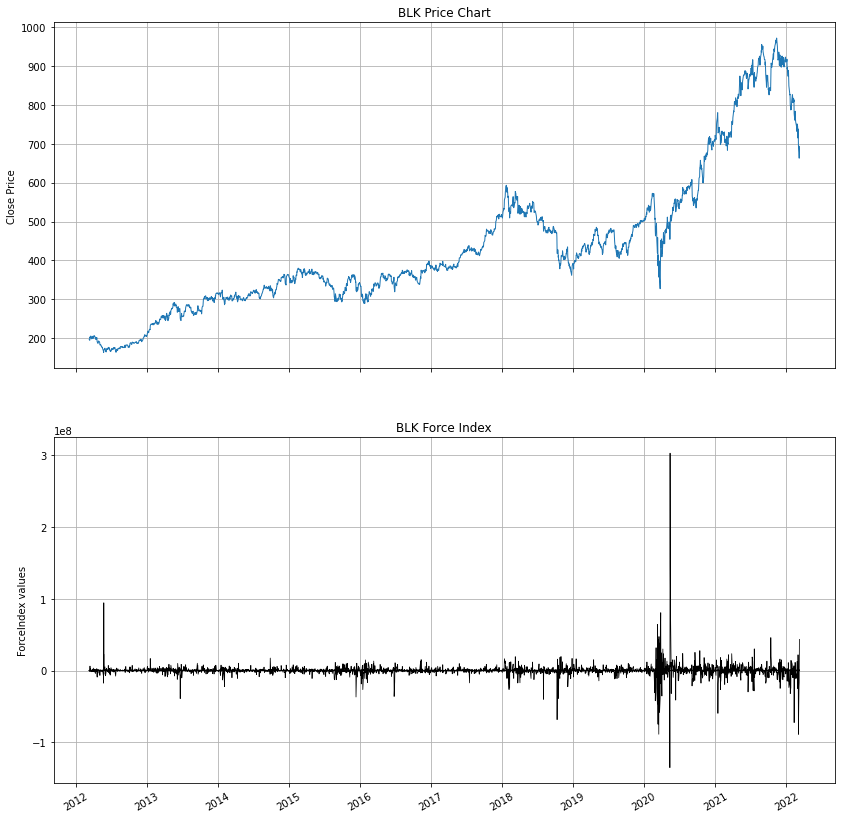

In [52]:
class ForceIndex(Strategy):
    def _init_(self):
        self.signal = 13
        self.prices = []
        self.indicator = []
        self.side = 0
    def push(self,event):
        orders = []
        prices = event.price[3] 
        self.prices.append(price)
        
        avg = 0
        up =0.3
        down = -0.3  
            
        self.indicator.append([up, avg, down])
                                    
        if prices < down:
            signal = -1 
        elif prices > up:
            signal = 1
        elif prices > avg and self.side == -1:
            signal = 0
        elif prices < avg and self.side == 1:
            signal = 0
        else:
            signal = self.side
            
            
        if self.side != signal:
            orders.append(Order(event.instrument, -self.side, 0))
            orders.append(Order(event.instrument, signal, 0))
            self.side = signal

        return orders
    
modelFI = ForceIndex()
fig=plt.figure(figsize=(14,14))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BLK Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(BRK_B_ForceIndex,'k',lw=0.75,linestyle='-')
plt.title('BLK Force Index')
plt.ylabel('ForceIndex values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

#print(evaluateHist(modelFI, {'BRK-B': 'BRK-B.csv'}))

=====================================================================================================
# c) Keltner Channel Strategy

In [53]:
import yahoofinancials as yf
ticker = 'BLK'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,196.320007,197.509995,195.279999,196.910004,152.656189,437600
1,2012-03-12,196.979996,196.979996,194.509995,194.880005,151.082397,627300
2,2012-03-13,197.000000,203.009995,195.259995,203.000000,157.377548,773000
3,2012-03-14,206.419998,206.419998,198.839996,200.669998,155.571182,491300
4,2012-03-15,201.240005,205.089996,199.350006,205.080002,158.990097,537600


In [54]:
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower

In [55]:
df=df.iloc[:,:5]
df['kc_middle'], df['kc_upper'], df['kc_lower'] = get_kc(df['high'],df['low'],df['close'],20,2,10)
df.head()

,formatted_date,open,high,low,close,kc_middle,kc_upper,kc_lower
0,2012-03-09,196.320007,197.509995,195.279999,196.910004,196.910004,201.369995,192.450012
1,2012-03-12,196.979996,196.979996,194.509995,194.880005,195.870248,200.582877,191.157619
2,2012-03-13,197.000000,203.009995,195.259995,203.000000,198.363682,207.337326,189.390039
3,2012-03-14,206.419998,206.419998,198.839996,200.669998,198.983119,209.755646,188.210592
4,2012-03-15,201.240005,205.089996,199.350006,205.080002,200.324287,211.269570,189.379004


In [56]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(0)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(0)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        else:
            buy_price.append(0)
            sell_price.append(0)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(df['close'], df['kc_upper'], df['kc_lower'])

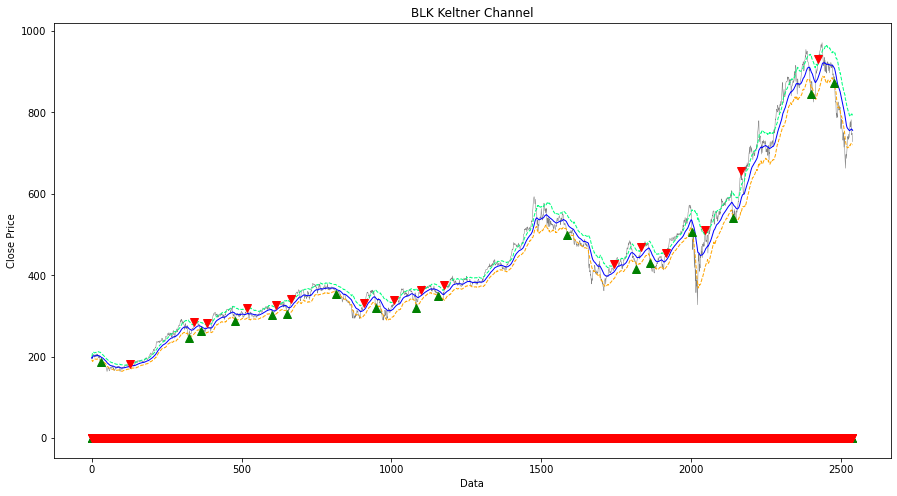

In [57]:
#df['formatted_date'] = pd.to_datetime(df['formatted_date'])
#df = df.set_index('formatted_date')

fig=plt.figure(figsize=(15,8))
df.close.plot(linewidth = 0.5,color = 'grey')
plt.title('BLK Keltner Channel')
plt.grid(True)
df.kc_upper.plot(linewidth = 1, color = 'springgreen', linestyle = '--')
df.kc_middle.plot(linewidth = 1, color = 'blue')
df.kc_lower.plot(linewidth = 1, color = 'orange', linestyle = '--')
plt.ylabel('Close Price')
plt.xlabel('Data')
plt.plot(buy_price, marker = '^', color = 'green', markersize = 8, linewidth = 0)
plt.plot(sell_price, marker = 'v', color = 'red', markersize = 8, linewidth = 0)

# Terceiro Ativo: JPM

=====================================================================================================
# a) Moving Average Convergence/Divergence (MACD)

In [58]:
import yahoofinancials as yf
ticker = 'JPM'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,40.750000,41.439999,40.500000,41.029999,30.949448,33494200
1,2012-03-12,40.860001,40.980000,40.200001,40.540001,30.579840,30763800
2,2012-03-13,41.020000,43.730000,40.820000,43.389999,32.729633,77277600
3,2012-03-14,43.619999,44.000000,43.070000,43.580002,32.872944,68028700
4,2012-03-15,43.639999,44.919998,42.930000,44.700001,33.717781,57117700


Number of trades: 197
Gross P&L: 24.49
Gross Accumulated return: 0.16%
Gross Average Return: 0.15%
Net P&L: 24.46
Hitting ratio: 36.55%



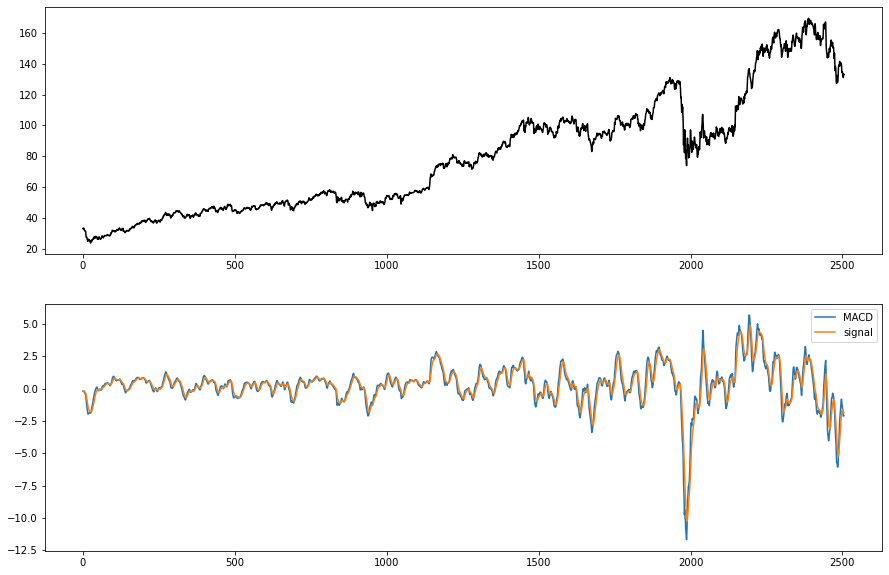

In [59]:
class MACD(Strategy):

    def __init__(self):
        self.slow = 26 # um mês (trading week = 5 dias)
        self.fast = 12 # 2 semanas
        self.signal = 9 # uma semana e meia
        self.prices = []
        self.indicator = []
        self.side = 0

    def push(self, event):
        orders = []
        price = event.price[3] 
        self.prices.append(price)
        
        if len(self.prices) >= self.slow + self.signal:
            fastEMA = pd.Series(self.prices).ewm(span=self.fast).mean()
            slowEMA = pd.Series(self.prices).ewm(span=self.slow).mean()
            macd = fastEMA - slowEMA
            signalEMA = macd.ewm(span=self.signal).mean()
            self.indicator.append([macd.iloc[-1], signalEMA.iloc[-1]])                        
            signal = (macd.iloc[-1] > signalEMA.iloc[-1])*2 - 1
            
            if self.side != signal:
                orders.append(Order(event.instrument, -self.side, 0))
                orders.append(Order(event.instrument, signal, 0))
                self.side = signal

        return orders
    
modelMACD = MACD()
print(evaluateHist(modelMACD, {'JPM': 'JPM.csv'}))

fig, ax = plt.subplots(2, 1, figsize=(15,10));

ax[0].plot(modelMACD.prices[-len(modelMACD.indicator):], color='black');
ax[1].plot(modelMACD.indicator);
ax[1].legend(['MACD', 'signal']);

=====================================================================================================
# b) Force Index (FI)

In [60]:
import yahoofinancials as yf
ticker = 'JPM'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,40.750000,41.439999,40.500000,41.029999,30.949455,33494200
1,2012-03-12,40.860001,40.980000,40.200001,40.540001,30.579838,30763800
2,2012-03-13,41.020000,43.730000,40.820000,43.389999,32.729622,77277600
3,2012-03-14,43.619999,44.000000,43.070000,43.580002,32.872955,68028700
4,2012-03-15,43.639999,44.919998,42.930000,44.700001,33.717785,57117700


In [61]:
def ForceIndex(data,ndays):
    ForceIndex=pd.Series(data['Close'].diff(ndays)* data['Volume'],name='ForceIndex')
    data=data.join(ForceIndex)
    return data
data = pdr.get_data_yahoo("JPM", start="2012-03-09", end="2022-03-09") 
data = pd.DataFrame(data)
print(data)

n = 1
BRK_B_ForceIndex = ForceIndex(data,n)
print(BRK_B_ForceIndex)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-03-09   41.439999   40.500000   40.750000   41.029999  33494200.0   
2012-03-12   40.980000   40.200001   40.860001   40.540001  30763800.0   
2012-03-13   43.730000   40.820000   41.020000   43.389999  77277600.0   
2012-03-14   44.000000   43.070000   43.619999   43.580002  68028700.0   
2012-03-15   44.919998   42.930000   43.639999   44.700001  57117700.0   
...                ...         ...         ...         ...         ...   
2022-03-03  140.979996  137.059998  139.839996  138.289993  16640800.0   
2022-03-04  135.419998  132.399994  134.940002  134.399994  21016000.0   
2022-03-07  132.690002  128.949997  132.169998  129.210007  27560100.0   
2022-03-08  131.789993  127.269997  129.639999  128.300003  19207800.0   
2022-03-09  135.240005  132.440002  132.899994  133.440002  17536200.0   

             Adj Close  
Date        

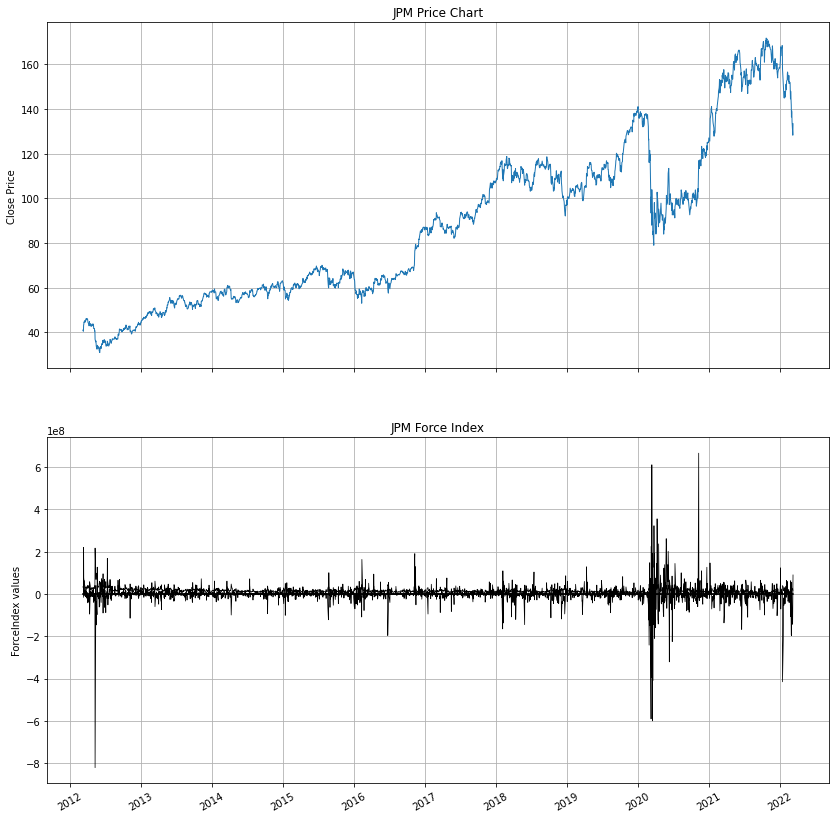

In [62]:
class ForceIndex(Strategy):
    def _init_(self):
        self.signal = 13
        self.prices = []
        self.indicator = []
        self.side = 0
    def push(self,event):
        orders = []
        prices = event.price[3] 
        self.prices.append(price)
        
        avg = 0
        up =0.3
        down = -0.3  
            
        self.indicator.append([up, avg, down])
                                    
        if prices < down:
            signal = -1 
        elif prices > up:
            signal = 1
        elif prices > avg and self.side == -1:
            signal = 0
        elif prices < avg and self.side == 1:
            signal = 0
        else:
            signal = self.side
            
            
        if self.side != signal:
            orders.append(Order(event.instrument, -self.side, 0))
            orders.append(Order(event.instrument, signal, 0))
            self.side = signal

        return orders
    
modelFI = ForceIndex()
fig=plt.figure(figsize=(14,14))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('JPM Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(BRK_B_ForceIndex,'k',lw=0.75,linestyle='-')
plt.title('JPM Force Index')
plt.ylabel('ForceIndex values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

#print(evaluateHist(modelFI, {'BRK-B': 'BRK-B.csv'}))

=====================================================================================================
# c) Keltner Channel Strategy

In [63]:
import yahoofinancials as yf
ticker = 'JPM'

start_date = '2012-03-09'
end_date =  '2022-09-09'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')
raw = pd.DataFrame(data[ticker]['prices']).dropna()
raw['formatted_date'] = pd.to_datetime(raw['formatted_date'])
raw = raw.set_index('formatted_date')
df = raw.iloc[:,1:]
df = df.reindex(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume'])
df.to_csv('{}.csv'.format(ticker))
df = pd.read_csv('{}.csv'.format(ticker))
df.head()

,formatted_date,open,high,low,close,adjclose,volume
0,2012-03-09,40.750000,41.439999,40.500000,41.029999,30.949467,33494200
1,2012-03-12,40.860001,40.980000,40.200001,40.540001,30.579857,30763800
2,2012-03-13,41.020000,43.730000,40.820000,43.389999,32.729618,77277600
3,2012-03-14,43.619999,44.000000,43.070000,43.580002,32.872963,68028700
4,2012-03-15,43.639999,44.919998,42.930000,44.700001,33.717781,57117700


In [64]:
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower

In [65]:
df=df.iloc[:,:5]
df['kc_middle'], df['kc_upper'], df['kc_lower'] = get_kc(df['high'],df['low'],df['close'],20,2,10)
df.head()

,formatted_date,open,high,low,close,kc_middle,kc_upper,kc_lower
0,2012-03-09,40.750000,41.439999,40.500000,41.029999,41.029999,42.909996,39.150002
1,2012-03-12,40.860001,40.980000,40.200001,40.540001,40.779024,42.543231,39.014817
2,2012-03-13,41.020000,43.730000,40.820000,43.389999,41.692141,45.159592,38.224690
3,2012-03-14,43.619999,44.000000,43.070000,43.580002,42.199188,45.199220,39.199155
4,2012-03-15,43.639999,44.919998,42.930000,44.700001,42.749307,45.988641,39.509972


In [66]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(0)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(0)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(0)
                sell_price.append(0)
                kc_signal.append(0)
        else:
            buy_price.append(0)
            sell_price.append(0)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(df['close'], df['kc_upper'], df['kc_lower'])

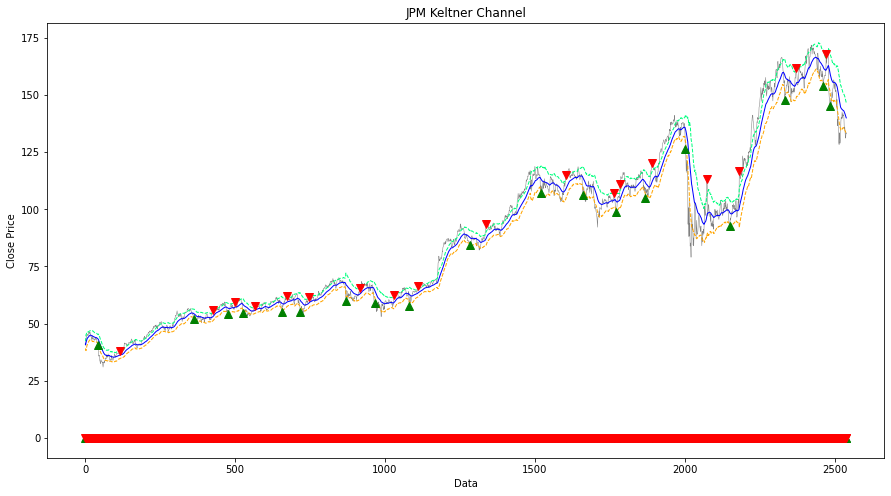

In [67]:
#df['formatted_date'] = pd.to_datetime(df['formatted_date'])
#df = df.set_index('formatted_date')

fig=plt.figure(figsize=(15,8))
df.close.plot(linewidth = 0.5,color = 'grey')
plt.title('JPM Keltner Channel')
plt.grid(True)
df.kc_upper.plot(linewidth = 1, color = 'springgreen', linestyle = '--')
df.kc_middle.plot(linewidth = 1, color = 'blue')
df.kc_lower.plot(linewidth = 1, color = 'orange', linestyle = '--')
plt.ylabel('Close Price')
plt.xlabel('Data')
plt.plot(buy_price, marker = '^', color = 'green', markersize = 8, linewidth = 0)
plt.plot(sell_price, marker = 'v', color = 'red', markersize = 8, linewidth = 0)

# Metodologia e Resultado

Em suma, a metodologia utilizada consiste na utilização dos três indicadores escolhidos para então, combinando os seus respectivos resultados e sinais, identificar os momentos ideais de buy, hold ou sell. Assim, embora não se tenha obtido sucesso na mesclagem desses sinais, analisa-se descritivamente os resultados conseguidos para cada um dos ativos quando aplicados aos indicadores técnicos de modelagem direcional determinados na introdução.

a) BRK-B

O ativo demonstrou o hitting rate mais alto dos três ativos escolhido, indicando que a modelagem tende, nem que seja por uma pequena diferença de 2%, a acertar mais vezes nas suas previsões de alta ou baixa. O método MACD colocou, para este ativo, um lucro bruto de 53.50, dado o menor retorno médio (de 0.03%). Pelo indicador Force Index, que evidencia a pressão real de compra e venda das cotações dadas as suas variabilidades, obteve-se um ambiente de baixa pressões de compra e venda quando comparado aos outros ativos. Importante evidenciar as grandes pressões obtidas no momento da pandemia de 2020. Por fim, para o terceiro método (Keltner Channel), foram obtidos 18 sinais de compra e 18 sinais de venda, de tal forma aos limites superior e inferior não terem sido quebrados muitas vezes no período de 10 anos analisado. Com uma tendência de alta nos preços desde o início do período, o modelo traria ganhos baixos. O seu único problema são casos em que o sinal de venda é colocado muito rapidamente após o sinal de compra.

b) BLK

O ativo demonstrou o pior hitting rate dos três ativos, porém um lucro bruto muito maior, indicando que mesmo que não acerte muitas vezes, quando acerta os ganhos são relevantes. O método MACD colocou, para este ativo um retorno médio de 0.23%, o maior dos três ativos analisados. Pelo indicador Force Index, obteve-se um ambiente de variabilidades ainda menores do que o ativo BRK-B, de tal forma a identificar baixas pressões de compra e venda no longo prazo. Importante, novamente, evidenciar as grandes pressões obtidas no momento da pandemia de 2020. Por fim, para o terceiro método (Keltner Channel), foram obtidos 17 marcadores de compra e 16 marcadores de venda. Por estarem mais espaçados, o problema observado em BRK-B mencionado acima, por sorte e qualidades do ativo BLK, pôde ser evitado. Com uma tendência de alta nos preços desde o início do período, o modelo traria ganhos relevantes. Vale notar a queda, porém, dos preços do ativo após 2020.


c) JPM

O ativo demonstrou um hitting rate muito próximo ao de BLK, pouco menor, porém o menor lucro bruto dos três ativos. O método MACD colocou, para este ativo um retorno médio de 0.15%, se localizando não tão bem quanto o ativo BLK, porém relativamente melhor quando comparado com o ativo BRK-B. Pelo indicador Force Index, obteve-se um ambiente de grandes variabilidade, de tal forma a identificar altas pressões de compra e venda, mesmo no longo prazo. Importante evidenciar as grandes pressões obtidas no momento da pandemia de 2020, ainda maiores para este ativo quando comparado com os demais. Por fim, para o terceiro método (Keltner Channel), foram obtidos 19 marcadores de compra e 18 marcadores de venda. O mesmo problema analisado em BRK-B quanto ao espaçamento no tempo desses sinais de compra e venda (comportamento de compra e venda em pares) foi observado. Com uma tendência de alta nos preços desde o início do período de análise, o modelo traria ganhos medianos. Vale notar a queda dos preços do ativo após 2020.